In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [9]:
# Import dataset
df = pd.read_csv('analyze.csv')
df.head(3)

,Unnamed: 0,id,feed_url,title,subtitle,description,summary,author,email,link,language,explicit,image,category,subcategory,created_at,last_build_date,rating
0,0,0002da5f-49a2-31ba-b44c-cdeabdf113cb,http://www.cbc.ca/podcasting/includes/dispatch...,Dispatches from CBC Radio,NaN,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio,podcasting@cbc.ca,http://www.cbc.ca/podcasting,en-ca,0,http://www.cbc.ca/podcasting/images/promo-disp...,News & Politics,Public Radio,2016-11-27T03:15:54,2016-11-27T03:15:54,2
1,1,00044845-beb8-35f3-99e2-01dbcfb6eb63,http://everydayissaturday.com/feed/podcast/,Motivation | Inspiration| Success with Entrepr...,Motivation - Inspiration - Success - Mindset -...,Sam Crowley delivers million dollar motivation...,Sam Crowley delivers million dollar motivation...,Sam Crowley,sam@everydayissaturday.com,http://everydayissaturday.com,en-us,0,http://everydayissaturday.com/wp-content/uploa...,Business,Business,2016-11-26T19:11:59,2016-11-21T14:19:34,2
2,2,00048bfa-8363-3f10-ac8e-8f27a31fe11f,http://disability411.jinkle.com/disability411.xml,Disability411 Podcast,NaN,Disability411 - The Podcast for Disability Inf...,NaN,Beth Case,NaN,http://disability411.jinkle.com/,en-us,0,NaN,Government & Organizations,Business,2016-11-27T00:37:30,2016-11-27T00:37:30,3


In [10]:
# Exploring Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32832 entries, 0 to 32831
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       32832 non-null  int64 
 1   id               32832 non-null  object
 2   feed_url         32832 non-null  object
 3   title            31524 non-null  object
 4   subtitle         26086 non-null  object
 5   description      30082 non-null  object
 6   summary          27287 non-null  object
 7   author           30120 non-null  object
 8   email            27256 non-null  object
 9   link             15358 non-null  object
 10  language         32479 non-null  object
 11  explicit         32832 non-null  int64 
 12  image            30471 non-null  object
 13  category         30409 non-null  object
 14  subcategory      19473 non-null  object
 15  created_at       32832 non-null  object
 16  last_build_date  32832 non-null  object
 17  rating           32832 non-null

In [11]:
print(df.shape)
print(df.dtypes)

(32832, 18)
Unnamed: 0          int64
id                 object
feed_url           object
title              object
subtitle           object
description        object
summary            object
author             object
email              object
link               object
language           object
explicit            int64
image              object
category           object
subcategory        object
created_at         object
last_build_date    object
rating              int64
dtype: object


In [12]:
df.describe()

,Unnamed: 0,explicit,rating
count,32832.000000,32832.000000,32832.000000
mean,16415.500000,0.093202,2.990619
std,9477.926355,0.290719,1.418548
min,0.000000,0.000000,1.000000
25%,8207.750000,0.000000,2.000000
50%,16415.500000,0.000000,3.000000
75%,24623.250000,0.000000,4.000000
max,32831.000000,1.000000,5.000000


In [13]:
df.count()

Unnamed: 0         32832
id                 32832
feed_url           32832
title              31524
subtitle           26086
description        30082
summary            27287
author             30120
email              27256
link               15358
language           32479
explicit           32832
image              30471
category           30409
subcategory        19473
created_at         32832
last_build_date    32832
rating             32832
dtype: int64

<AxesSubplot:>

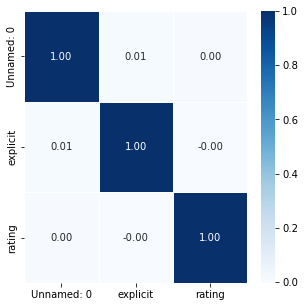

In [14]:
# Check Data correlation Matrix
plt.figure(figsize=(5,5))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [15]:
# Check data null value
df.isnull().sum()

Unnamed: 0             0
id                     0
feed_url               0
title               1308
subtitle            6746
description         2750
summary             5545
author              2712
email               5576
link               17474
language             353
explicit               0
image               2361
category            2423
subcategory        13359
created_at             0
last_build_date        0
rating                 0
dtype: int64

In [16]:
# Content Based using tfidf function.
def content_based_tfidf(dataset):
    # Encoding Data
    df_new = dataset[0:10000]
    encoder = LabelEncoder()
    label = encoder.fit_transform(df['author'])
    label1 = encoder.fit_transform(df['id'])
    label2 = encoder.fit_transform(df['language'])
    new = pd.DataFrame(label, columns = ['author'])
    new1 = pd.DataFrame(label1, columns = ['id'])
    new2 = pd.DataFrame(label2, columns = ['language'])
    new3 = pd.concat([new,new1,new2], axis=1)

    # Using TfidfVectorizer and stop_words using English.
    tfidf = TfidfVectorizer(stop_words='english')
    df_new['description'] = df_new['description'].fillna('')
    tfidf_matrix = tfidf.fit_transform(df_new['description'])

    # Calculate cosine similarity.
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Construct data using index and title
    indices = pd.Series(df_new.index, index=df_new['title']).drop_duplicates()
    return df_new, cosine_sim, indices

In [17]:
# Recommendation function by title.
def recommend_title(title, cosine_sim, indices, df_new):
    # Check title that matching with another potcast.
    idx = indices[title]

    # Get the similarity scores of podcasts.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the potcasts by silmilarity score.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get scores of the 10 most similar podcasts
    sim_scores = sim_scores[1:11]

    # Get the podcasts indices
    podcasts_indices = [i[0] for i in sim_scores]

    # Return top 10 most similar podcasts
    return df_new['title'].iloc[podcasts_indices]

In [24]:
# Function of clean dataset.
def clean_data(data):
    if isinstance(data, list):
        return [str.lower(i.replace(" ", "")) for i in data]
    else:
        # Check if it exists. If it is not, return empty string
        if isinstance(data, str):
            return str.lower(data.replace(" ", ""))
        else:
            return ''

In [25]:
# Function of Content Based using tfidf, based on category
def content_based_category(dataset):
    features = ['author', 'author', 'language', 'category', 'subcategory']
    df_new1 = dataset
    # Apply clean_data function to data features.
    for feature in features:
        df_new1[feature] = df_new1[feature].apply(clean_data)  

    # Create new feature by divide word
    def create_newfeat(x):
        return  x['author'] + ' ' + x['language'] + ' ' + x['category'] + ' ' + x['subcategory']
      
    df_new1['newfeat'] = df_new1.apply(create_newfeat, axis=1)
    df_new2 = df_new1[0:10000]

    # Create the count matrix using CountVectorizer
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(df_new2['newfeat'])

    # Compute Cosine Similarity matrix
    cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

    df_new1 = df_new1.reset_index()
    indices = pd.Series(df_new1.index, index=df_new1['title'])
    
    return df_new1, cosine_sim2, indices

In [33]:
# Main function
def content_main_func(dataset, title, boolean_func):
    # Case of boolean type is description
    if boolean_func == 'description':
        new_data, cosine_sim, indices = content_based_tfidf(dataset)
        result = recommend_title(title, cosine_sim, indices, new_data)
        return result
        
    # Case of boolean type is category or anything else.
    else:
        new_data, cosine_sim, indices = content_based_category(dataset)
        result = recommend_title(title, cosine_sim, indices, new_data)
        return result

In [34]:
result = content_main_func(df, 'The Kyle Warren Radio Show', 'description')
result

C:\Users\User\AppData\Local\Temp/ipykernel_26456/2846461895.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['description'] = df_new['description'].fillna('')


910                                   The Malliard Report
9439                                         Comments on:
7675                   Cato Institute Event Videos (Full)
1661    The Motivational Marketing Show with Robert Im...
9171             RTÉ - Our War - The Great Debate podcast
7615                                William Hill Football
5865    Clone Wars Roundtable: Information, Commentary...
6184    Republic Forces Radio Network -- A Star Wars C...
1211                                   Far Far Away Radio
5382                                           Drone News
Name: title, dtype: object

In [35]:
result = content_main_func(df, 'The Kyle Warren Radio Show', 'category')
result

1386     Blubrry Podcasting: Harvey Litt's mycast
6822                     Open Spaces (Whole Show)
74                         The Robert Wenzel Show
3698                               Fox News Flash
5134         Resonance: An Anarchist Audio Distro
5555            Behind the News with Doug Henwood
6947                      The Erick Erickson Show
53      Logos Radio Network » Truth Exposed Radio
145                                 Bill O'Reilly
417                   Bill Moyers in Conversation
Name: title, dtype: object